In [24]:
from bayes_opt import BayesianOptimization
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import mlab
from matplotlib import gridspec
from TwoDimEnvironmentbc import environment_array
%matplotlib inline

In [25]:
def unique_rows(a):
    """
    A functions to trim repeated rows that may appear when optimizing.
    This is necessary to avoid the sklearn GP object from breaking

    :param a: array to trim repeated rows from

    :return: mask of unique rows
    """

    # Sort array and kep track of where things should go back to
    order = np.lexsort(a.T)
    reorder = np.argsort(order)

    a = a[order]
    diff = np.diff(a, axis=0)
    ui = np.ones(len(a), 'bool')
    ui[1:] = (diff != 0).any(axis=1)

    return ui[reorder]

In [26]:
def target(x, y):
    
    return environment_array(x,y)

In [27]:
n = 1e5
x = np.linspace(40,65,100)
y = np.linspace(2,4,100)
X, Y = np.meshgrid(x, y)
x = X.ravel()
y = Y.ravel()
X = np.vstack([x, y]).T[:, [1, 0]]
z = target(x, y)

In [28]:
print(max(z))
print(min(z))

2761.031637651406
874.8605917857528


IndexError: list index out of range

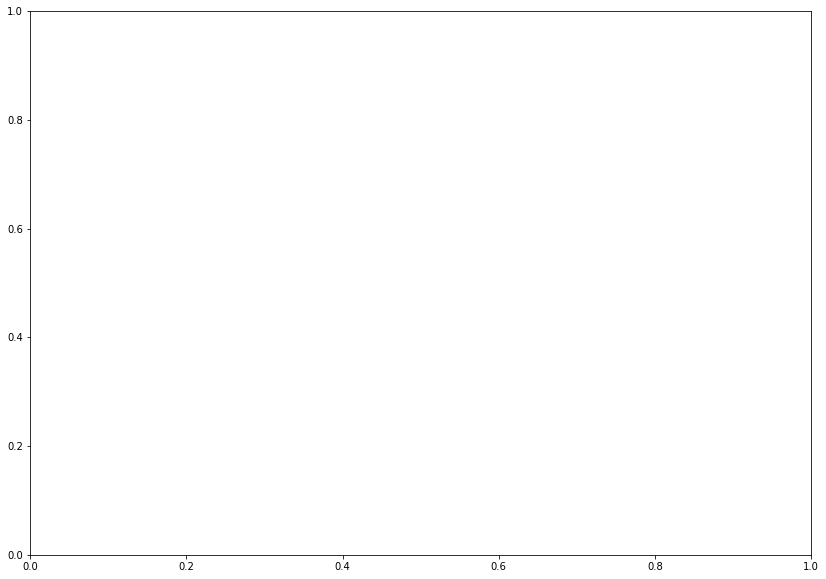

In [31]:
fig, axis = plt.subplots(1, 1, figsize=(14, 10))
gridsize=150

im = axis.hexbin(x, y, C=z, gridsize=gridsize, cmap=cm.jet, bins=None, vmin=-0.9, vmax=2.1)
axis.axis([x.min(), x.max(), y.min(), y.max()])

cb = fig.colorbar(im, )
cb.set_label('Value')

In [7]:
def posterior(bo, X):
    ur = unique_rows(bo.X)
    bo.gp.fit(bo.X[ur], bo.Y[ur])
    mu, sigma2 = bo.gp.predict(X, eval_MSE=True)
    return mu, np.sqrt(sigma2), bo.util.utility(X, bo.gp, bo.Y.max())

In [18]:
def plot_2d(name=None):

    mu, s, ut = posterior(bo)

    fig, ax = plt.subplots(2, 2, figsize=(14, 10))
    gridsize=150

    # fig.suptitle('Bayesian Optimization in Action', fontdict={'size':30})

    # GP regression output
    ax[0][0].set_title('Gausian Process Predicted Mean', fontdict={'size':15})
    im00 = ax[0][0].hexbin(x, y, C=mu, gridsize=gridsize, cmap=cm.jet, bins=None, vmin=-0.9, vmax=2.1)
    ax[0][0].axis([x.min(), x.max(), y.min(), y.max()])
    ax[0][0].plot(bo.X[:, 1], bo.X[:, 0], 'D', markersize=4, color='k', label='Observations')

    ax[0][1].set_title('Target Function', fontdict={'size':15})
    im10 = ax[0][1].hexbin(x, y, C=z, gridsize=gridsize, cmap=cm.jet, bins=None, vmin=-0.9, vmax=2.1)
    ax[0][1].axis([x.min(), x.max(), y.min(), y.max()])
    ax[0][1].plot(bo.X[:, 1], bo.X[:, 0], 'D', markersize=4, color='k')


    ax[1][0].set_title('Gausian Process Variance', fontdict={'size':15})
    im01 = ax[1][0].hexbin(x, y, C=s, gridsize=gridsize, cmap=cm.jet, bins=None, vmin=0, vmax=1)
    ax[1][0].axis([x.min(), x.max(), y.min(), y.max()])

    ax[1][1].set_title('Acquisition Function', fontdict={'size':15})
    im11 = ax[1][1].hexbin(x, y, C=ut, gridsize=gridsize, cmap=cm.jet, bins=None, vmin=0, vmax=8)

    np.where(ut.reshape((300, 300)) == ut.max())[0]
    np.where(ut.reshape((300, 300)) == ut.max())[1]

    ax[1][1].plot([np.where(ut.reshape((300, 300)) == ut.max())[1]/50., 
                   np.where(ut.reshape((300, 300)) == ut.max())[1]/50.], 
                  [0, 6], 
                  'k-', lw=2, color='k')

    ax[1][1].plot([0, 6],
                  [np.where(ut.reshape((300, 300)) == ut.max())[0]/50., 
                   np.where(ut.reshape((300, 300)) == ut.max())[0]/50.], 
                  'k-', lw=2, color='k')

    ax[1][1].axis([x.min(), x.max(), y.min(), y.max()])

    for im, axis in zip([im00, im10, im01, im11], ax.flatten()):
        cb = fig.colorbar(im, ax=axis)
        # cb.set_label('Value')

    if name is None:
        name = '_'

    plt.tight_layout()

    # Save or show figure?
    # fig.savefig('bo_eg_' + name + '.png')
    plt.show()
    plt.close(fig)

In [19]:
bo = BayesianOptimization(target, {'x': (0, 6), 'y': (0, 6)})

In [20]:

bo.maximize(init_points=5, n_iter=0, acq='ucb', kappa=10)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        |  0.4261   |  4.546    |  5.367    |
|  2        |  0.5559   |  1.038    |  3.351    |
|  3        |  0.7156   |  3.358    |  2.052    |
|  4        |  0.308    |  0.8185   |  4.255    |
|  5        |  0.0985   |  3.108    |  3.718    |


TypeError: posterior() missing 1 required positional argument: 'X'